In [8]:
import numpy as np
import pandas as pd
import os
import copy

In [9]:
ALL_MODELS = ["openai-community/gpt2", "openai-community/gpt2-medium", "openai-community/gpt2-large"] +\
    ["openai-community/gpt2-xl", "meta-llama/Llama-3.2-1B", "meta-llama/Llama-3.2-3B", "allenai/OLMo-2-0425-1B", "google/gemma-2-2b"] +\
    ["allenai/OLMo-2-1124-7B", "allenai/OLMo-2-1124-13B", "google/gemma-2-9b"]

SMALL_MODELS = ["openai-community/gpt2", "openai-community/gpt2-medium", "openai-community/gpt2-large"] +\
    ["openai-community/gpt2-xl", "meta-llama/Llama-3.2-1B", "allenai/OLMo-2-0425-1B",]

BIG_MODELS = ["meta-llama/Llama-3.2-3B", "google/gemma-2-2b"] +\
    ["allenai/OLMo-2-1124-7B", "allenai/OLMo-2-1124-13B", "google/gemma-2-9b"]

CONDITIONS = ["Linear_Representation", "Probability"]

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
to_concat = []

for model in BIG_MODELS:
    path = os.path.join("../results", model, "Correlation", "Feature_Correlations.csv")
    to_concat.append(pd.read_csv(path))

correlations = pd.concat(to_concat, axis=0)
correlations["Modal Difference Vector"] = correlations["Vector"]



In [13]:
correlations.head(10)

,Vector,Feature,Pearson r,Modal Difference Vector
0,probable_improbable,5-Gram Log-Prob,-0.192597,probable_improbable
1,probable_improbable,GPT2-XL Log-Prob,-0.213846,probable_improbable
2,probable_improbable,PCFG Log-Prob,-0.177336,probable_improbable
3,probable_improbable,Arousal,0.013855,probable_improbable
4,probable_improbable,Conversational,-0.136108,probable_improbable
5,probable_improbable,Sense,-0.222825,probable_improbable
6,probable_improbable,Gram.,-0.212500,probable_improbable
7,probable_improbable,Frequency,-0.273540,probable_improbable
8,probable_improbable,Imageability,-0.442899,probable_improbable
9,probable_improbable,Others Thoughts,-0.079650,probable_improbable


In [14]:
# Take absolute mean correlation of vector projections to interpretable features across models
correlations_avg = correlations.groupby(["Modal Difference Vector", "Feature"], as_index=False)["Pearson r"].mean()
correlations_avg["Pearson r"] = correlations_avg["Pearson r"].abs()

# Pivot table for easy plotting
heatmap_data = correlations_avg.pivot(index="Modal Difference Vector", columns="Feature", values="Pearson r")
heatmap_data["Event Likelihood"] = heatmap_data["Subjective Event Likelihood"]
heatmap_data["Others' Thoughts"] = heatmap_data["Others Thoughts"]
heatmap_data = heatmap_data.drop("Subjective Event Likelihood", axis=1)
heatmap_data = heatmap_data.drop("Others Thoughts", axis=1)

row_order = ["probable_improbable", "improbable_impossible", "impossible_inconceivable"]
column_order = ["Event Likelihood", "Ranked Inconceivability", "Imageability", "Physical", "Places", "Sense", "Gram.", "Arousal", "Valence", "Others' Thoughts", "Conversational", "Frequency", "5-Gram Log-Prob", "PCFG Log-Prob", "GPT2-XL Log-Prob"]
heatmap_data = heatmap_data.loc[row_order, column_order]


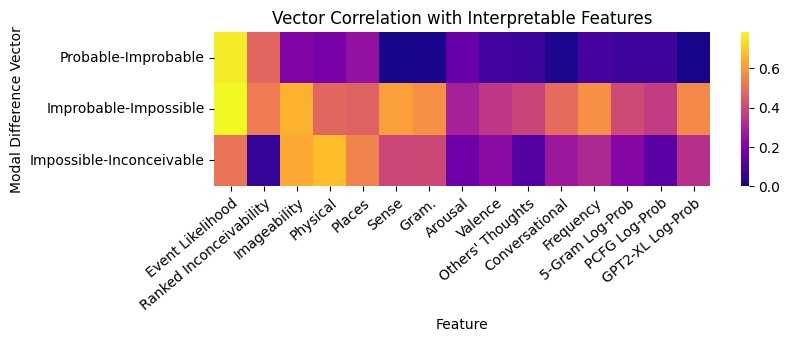

In [15]:
# Plot Heatmap nicely
import matplotlib

fig = plt.figure(figsize=(8, 2))
ax = sns.heatmap(heatmap_data, cmap="plasma", yticklabels=["Probable-Improbable", "Improbable-Impossible", "Impossible-Inconceivable"], vmin=0)


plt.setp(ax.get_xticklabels(), rotation=40, ha='right')  # or rotation=30

# Create offset transform by 5 points in x direction
# https://stackoverflow.com/questions/28615887/how-to-move-a-tick-label

dx = 7/72.; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

# apply offset transform to all x ticklabels.
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

plt.title("Vector Correlation with Interpretable Features")
plt.savefig("../Figures/Study4.pdf", format="pdf", bbox_inches="tight")
plt.show()